In [3]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Subhalo Alignments

In [4]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0.0, dz_tol=0.001, version_name='halotools_v0p4')
for name in halocat.halo_table.dtype.names:
    print(name)

halo_vmax_firstacc
halo_dmvir_dt_tdyn
halo_macc
halo_scale_factor
halo_vmax_mpeak
halo_m_pe_behroozi
halo_xoff
halo_spin
halo_scale_factor_firstacc
halo_c_to_a
halo_mvir_firstacc
halo_scale_factor_last_mm
halo_scale_factor_mpeak
halo_pid
halo_m500c
halo_id
halo_halfmass_scale_factor
halo_upid
halo_t_by_u
halo_rvir
halo_vpeak
halo_dmvir_dt_100myr
halo_mpeak
halo_m_pe_diemer
halo_jx
halo_jy
halo_jz
halo_m2500c
halo_mvir
halo_voff
halo_axisA_z
halo_axisA_x
halo_axisA_y
halo_y
halo_b_to_a
halo_x
halo_z
halo_m200b
halo_vacc
halo_scale_factor_lastacc
halo_vmax
halo_m200c
halo_vx
halo_vy
halo_vz
halo_dmvir_dt_inst
halo_rs
halo_nfw_conc
halo_hostid
halo_mvir_host_halo


In [5]:
hosts = (halocat.halo_table['halo_upid']==-1)
subs = (halocat.halo_table['halo_upid']!=-1)

In [6]:
from halotools.utils import crossmatch, normalized_vectors
inds1, inds2 = crossmatch(halocat.halo_table['halo_hostid'], halocat.halo_table['halo_id'])

In [7]:
x = np.zeros(len(halocat.halo_table))
y = np.zeros(len(halocat.halo_table))
z = np.zeros(len(halocat.halo_table))
x[inds1] = halocat.halo_table['halo_x'][inds2]
y[inds1] = halocat.halo_table['halo_y'][inds2]
z[inds1] = halocat.halo_table['halo_z'][inds2]

dx = (halocat.halo_table['halo_x'] - x)
dy = (halocat.halo_table['halo_y'] - y)
dz = (halocat.halo_table['halo_z'] - z)

# account for PBCs
mask = (dx>halocat.Lbox[0]/2.0)
dx[mask] = dx[mask] - halocat.Lbox[0]
mask = (dx<-1.0*halocat.Lbox[0]/2.0)
dx[mask] = dx[mask] + halocat.Lbox[0]

mask = (dy>halocat.Lbox[1]/2.0)
dy[mask] = dy[mask] - halocat.Lbox[1]
mask = (dy<-1.0*halocat.Lbox[1]/2.0)
dy[mask] = dy[mask] + halocat.Lbox[1]

mask = (dz>halocat.Lbox[2]/2.0)
dz[mask] = dz[mask] - halocat.Lbox[2]
mask = (dz<-1.0*halocat.Lbox[2]/2.0)
dz[mask] = dz[mask] + halocat.Lbox[2]

# calculate radial distance and readial unit vector
radius = np.sqrt(dx**2+dy**2+dz**2)
r = normalized_vectors(np.vstack((dx, dy, dz)).T)
r = np.nan_to_num(r)

# calculate scaled radial distance
scaled_radius = np.zeros(len(halocat.halo_table))
scaled_radius[inds1] = radius[inds1]/halocat.halo_table['halo_rvir'][inds2]

/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:88: RuntimeWarning: invalid value encountered in true_divide
  return vectors/elementwise_norm(vectors).reshape((npts, -1))


In [43]:
from halotools.utils import rotation_matrices_from_vectors, elementwise_dot, normalized_vectors
from intrinsic_alignments.ia_models.utils import project_onto_plane
major_axis = normalized_vectors(np.vstack((halocat.halo_table['halo_axisA_x'],
                                           halocat.halo_table['halo_axisA_y'],
                                           halocat.halo_table['halo_axisA_z'])).T)
major_axis = np.nan_to_num(major_axis)
a = np.sum(major_axis, axis=-1)
mask = (a >= 0.0) & np.isfinite(np.sum(major_axis, axis=-1))

spin_axis = normalized_vectors(np.vstack((halocat.halo_table['halo_jx'],
                                          halocat.halo_table['halo_jy'],
                                          halocat.halo_table['halo_jz'])).T)

minor_axis = project_onto_plane(minor_axis, major_axis)

/Users/duncan/Projects/intrinsic_alignments/ia_models/utils.py:77: RuntimeWarning: invalid value encountered in true_divide
  return vectors/elementwise_norm(vectors).reshape((npts, -1))


In [44]:
np.nan_to_num(major_axis)

array([[ 0.88524985, -0.34797242,  0.30862251],
       [ 0.75667411, -0.04767155,  0.65205193],
       [ 0.87946934,  0.402192  ,  0.2545099 ],
       ..., 
       [ 0.89812541,  0.19750957, -0.39288768],
       [ 0.88158786,  0.47188231,  0.0113994 ],
       [ 0.91562223,  0.0180797 ,  0.40163305]], dtype=float32)

In [78]:
# calculate miaslignment angle
from halotools.utils import angles_between_list_of_vectors

theta_ma = angles_between_list_of_vectors(r, halo_orientations)

/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in greater
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in less
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in less
  mask2 = (dot < -1) & (dot > -1 - tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in greater
  mask2 = (dot < -1) & (dot > -1 - tol)


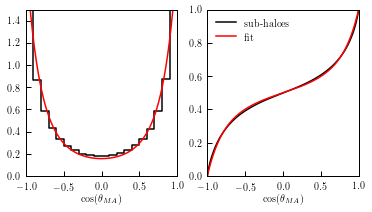

KstestResult(statistic=0.01817777896347908, pvalue=2.1793564069510493e-96)

In [214]:
from intrinsic_alignments.ia_models.ia_model_components import DimrothWatson, inverse_alignment_strenth
d = DimrothWatson()

costheta_bins = np.linspace(-1,1,21)
mask = np.isfinite(theta_ma) & subs
counts = np.histogram(np.cos(theta_ma[mask]), bins=costheta_bins)[0]
counts = 1.0*counts/np.sum(counts)/np.diff(costheta_bins)

k = d.fit(np.cos(theta_ma[mask]), floc=0, fscale=1)[0]
full_sample_p = inverse_alignment_strenth(k)

x = np.linspace(-1,1,1000)
fig, axes = plt.subplots(1,2,figsize=(6.6,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax = axes[0]
ax.step(costheta_bins[1:], counts, color='black')
ax.plot(x, d.pdf(x, k=k), '-', color='red')
ax.set_ylim([0,1.5])
ax.set_xlim([-1,1])
ax.set_xlabel(r'$\cos(\theta_{MA})$')

cdf = np.ones(len(np.cos(theta_ma[mask])))
cdf = np.cumsum(cdf)/np.sum(cdf)

ax=axes[1]
p1, = ax.step(np.sort(np.cos(theta_ma[mask])), cdf, color='black')
p2, = ax.plot(x, d.cdf(x, k=k), '-', color='red')
ax.set_ylim([0,1])
ax.set_xlim([-1,1])
ax.set_xlabel(r'$\cos(\theta_{MA})$')
ax.legend([p1,p2],['sub-haloes','fit'], loc='upper left', frameon=False, fontsize=10)
plt.show()

from scipy.stats import kstest
kstest(np.cos(theta_ma[mask]), d.cdf, args=(k,))

In [215]:
# check for radial dependence 

rbins = np.logspace(-1.5,0.0,15)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0
inds = np.digitize(scaled_radius, bins=rbins)
Nboot=20
k = np.zeros((len(rbins)-1,Nboot))
for i in range(0,len(rbins)-1):
    mask = (inds==i) & np.isfinite(theta_ma)
    x = np.cos(theta_ma[mask])
    for j in range(0,Nboot):
        xx = np.random.choice(x, size=len(x), replace=True)
        k[i,j] = d.fit(xx, floc=0, fscale=1)[0]

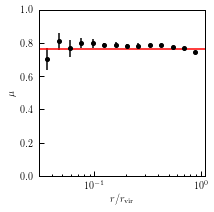

In [216]:
p = np.mean(inverse_alignment_strenth(k), axis=-1)
err_p = np.std(inverse_alignment_strenth(k), axis=-1)

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.errorbar(rbin_centers, p, yerr=5*err_p, fmt='o', ms=4, color='black')
plt.plot([0.001,2], [full_sample_p, full_sample_p], '-', color='red')
plt.ylim([0,1])
plt.xscale('log')
plt.xlim(0.03,1.1)
plt.xlabel(r'$r/r_{\rm vir}$')
plt.ylabel(r'$\mu$')
plt.show()

In [222]:
# check for host mass dependence
mbins = np.logspace(11,15,20)
mbins_centers = (mbins[:-1]+mbins[1:])/2.0
inds = np.digitize(halocat.halo_table['halo_mvir_host_halo'], bins=mbins)
Nboot=20
k = np.zeros((len(mbins)-1,Nboot))
for i in range(0,len(mbins)-1):
    mask = (inds==i) & np.isfinite(theta_ma)
    x = np.cos(theta_ma[mask])
    for j in range(0,Nboot):
        xx = np.random.choice(x, size=len(x), replace=True)
        k[i,j] = d.fit(xx, floc=0, fscale=1)[0]

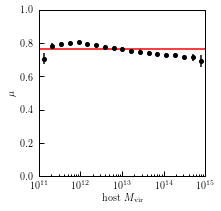

In [229]:
p = np.mean(inverse_alignment_strenth(k), axis=-1)
err_p = np.std(inverse_alignment_strenth(k), axis=-1)

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.errorbar(mbins_centers, p, yerr=5*err_p, fmt='o', ms=4, color='black')
plt.plot([0.001,10**16], [full_sample_p, full_sample_p], '-', color='red')
plt.ylim([0,1])
plt.xlim([10**11,10**15])
plt.xscale('log')
plt.xlabel('host '+r'$M_{\rm vir}$')
plt.ylabel(r'$\mu$')
plt.show()

In [261]:
# check for sub mass dependence
mbins = np.logspace(10,14,20)
mbins_centers = (mbins[:-1]+mbins[1:])/2.0
inds = np.digitize(halocat.halo_table['halo_mvir'], bins=mbins)
Nboot=20
k = np.zeros((len(mbins)-1,Nboot))
for i in range(0,len(mbins)-1):
    mask = (inds==i) & np.isfinite(theta_ma)
    x = np.cos(theta_ma[mask])
    for j in range(0,Nboot):
        xx = np.random.choice(x, size=len(x), replace=True)
        k[i,j] = d.fit(xx, floc=0, fscale=1)[0]

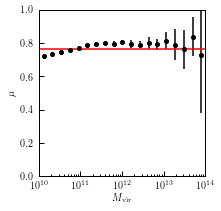

In [262]:
p = np.mean(inverse_alignment_strenth(k), axis=-1)
err_p = np.std(inverse_alignment_strenth(k), axis=-1)

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.errorbar(mbins_centers, p, yerr=5*err_p, fmt='o', ms=4, color='black')
plt.plot([0.001,10**16], [full_sample_p, full_sample_p], '-', color='red')
plt.ylim([0,1])
plt.xlim([10**10,10**14])
plt.xscale('log')
plt.xlabel(r'$M_{\rm vir}$')
plt.ylabel(r'$\mu$')
plt.show()

In [260]:
# check for sub-halo ellipticity

q = halocat.halo_table['halo_b_to_a']
s = halocat.halo_table['halo_c_to_a']
e = (1.0-q)/(1.0+q)

ebins = np.logspace(-2,0.0,20)
ebins_centers = (ebins[:-1]+ebins[1:])/2.0
inds = np.digitize(e, bins=ebins)
Nboot=5
k = np.zeros((len(ebins)-1,Nboot))
for i in range(0,len(ebins)-1):
    mask = (inds==i) & np.isfinite(theta_ma)
    x = np.cos(theta_ma[mask])
    for j in range(0,Nboot):
        xx = np.random.choice(x, size=len(x), replace=True)
        k[i,j] = d.fit(xx, floc=0, fscale=1)[0]

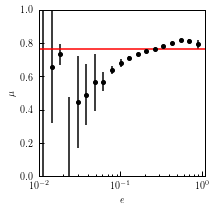

In [259]:
p = np.mean(inverse_alignment_strenth(k), axis=-1)
err_p = np.std(inverse_alignment_strenth(k), axis=-1)

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.errorbar(ebins_centers, p, yerr=5*err_p, fmt='o', ms=4, color='black')
plt.plot([0.001,10**16], [full_sample_p, full_sample_p], '-', color='red')
plt.ylim([0,1])
plt.xlim([0.01,1.1])
plt.xscale('log')
plt.xlabel('$e$')
plt.ylabel(r'$\mu$')
plt.show()

# subhalo distributions

In [267]:
# rotate host haloes into aligned traxial coordinatre
from halotools.utils import rotation_matrices_from_vectors
v1 = halo_orientations
v2 = np.zeros((len(halocat.halo_table),3))
v2[:,0] = 1.0

rot1 = rotation_matrices_from_vectors(v1, v2)